<span style="background-color: #FFFF00"><h1> Notebook A1</h1> </span>

**Project: "Intra-Regional Migration and Transportation in New York Metro Area"**

***Due to the large data our team is working with, there are a total of <font color='red'>four</font> notebooks submitted for this midterm <font color='red'>(Two from each team member)</font>***

***I also outlined the notebook into the Table of Content - hope it helps to read through the notebook</font>***






<h2>
<code style="background:grey;color:black">Research questions in this specific notebook:
</code>
</h2>

<p>

- **Q1: What is moving trend during the pandemic?** <p>
    - **Expected exploration** <p> 
        - We want to know how much people are moving during the pandamic and if there's an increasing number of people who consider moving.
        - We want to know which states and cities have larger moving population.<p> 
        <p> 
    
    - **About the purpose of this section** <p>
        - Due to our limit access to the data related to the moving trend in the COVID time, we have to reproduce the findings from the existing research. This section/research question is not among  our central discussion, but it does play an important role to present the topic as an openning. Therefore, we decided to reproduce the data findings. For the purpose of this class, we took this section as a good opportunity of practicing the mapping skills - playing around the arguements that can make the graphs look better.


- Q2: What is general out-migration pattern at the national scale?
    - **Expected exploration** <p> 
        - We want to know which metro area has most net gain and net loss of migration population.
        - We want to know how much people are in the process of out-migration <p> 


<h2>
<code style="background:grey;color:black">Section 0. Import All Modules and Set Up Notebook
</code>
</h2>

In [1]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:,.0f}'.format

<h2>
<code style="background:grey;color:black">Section 1. Reproduce and Visualize Moving Trend During COVID
</code>
</h2>

<h3>
<code style="background:grey;color:black">Section 1.1 Moving Trend in 2019 and 2020 COVID Time
</code>
</h3>


I'm going to reproduce the findings from the existing reserach (https://www.mymove.com/moving/covid-19/coronavirus-moving-trends/). 

First, I typed all data in excel and exported to CSV as the raw dataset for this section.

Then, I'm importing them:

In [3]:
COVID_Total_rawdata = pd.read_csv('data/01_COVID_Total_Mover.csv')

In [4]:
COVID_Total_rawdata

Unnamed: 0     2019     2020  Average_Case
0        Feb  2030000  2090000             2
1        Mar  2400000  2910000          6077
2        Apr  2510000  2750000         29577
3        May  2740000  2630000         23340
4       June  2830000  2640000         28467
5       July  2870000  2960000         61882

In [5]:
COVID_Total_rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    6 non-null      object
 1   2019          6 non-null      int64 
 2   2020          6 non-null      int64 
 3   Average_Case  6 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 320.0+ bytes


In [6]:
COVID_Total_rawdata.columns = ['Month','2019','2020','Average_COVID_New_Case']

In [7]:
COVID_Total_rawdata

Month     2019     2020  Average_COVID_New_Case
0   Feb  2030000  2090000                       2
1   Mar  2400000  2910000                    6077
2   Apr  2510000  2750000                   29577
3   May  2740000  2630000                   23340
4  June  2830000  2640000                   28467
5  July  2870000  2960000                   61882

<h3>
<code style="background:yellow;color:red">Finding1: Moving trend during COVID and same period in 2019:
</code>
</h3>


In [8]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Scatter(y=COVID_Total_rawdata['2019'],
                         x=COVID_Total_rawdata['Month'],
                         text= COVID_Total_rawdata['2019'],
                         name="2019",
                         textposition = 'top center',
                         mode='lines+markers+text',
                         marker=dict(color='#5D69B1', size=8),
                         line=dict(color='#1a8dff', width=2),
                         texttemplate = "%{y:.3s}"
                        ),
             secondary_y=True
             )

fig.add_trace(go.Scatter(y=COVID_Total_rawdata['2020'],
                         x=COVID_Total_rawdata['Month'],
                         name="2020",
                         text= COVID_Total_rawdata['2020'],
                         textposition = 'top center',
                         mode='lines+markers+text',
                         marker=dict(color='#5D69B1', size=8),
                         line=dict(color='#ff1a1a', width=2),
                         texttemplate = "%{y:.3s}"
                        ),
              secondary_y=True
             )

fig.add_trace(go.Bar(y=COVID_Total_rawdata['Average_COVID_New_Case'], 
                     x=COVID_Total_rawdata['Month'],
                    text= COVID_Total_rawdata['Average_COVID_New_Case'],
                    name="Average Daily New COVID Cases",
                    width=[0.25,0.25,0.25,0.25,0.25,0.25]
                    ),
              secondary_y=False
             )

fig.update_layout(height=600, width=1000)
fig.update_layout(legend_title_text = "Year")
fig.update_xaxes(title_text="<b>Month in 2019 and 2020</b>")
fig.update_yaxes(title_text="<b>Average Daily New COVID Cases</b>", secondary_y=False)
fig.update_yaxes(title_text="<b>Monthly Moving</b>", secondary_y=True)

fig.show()

<h3>
<code style="background:grey;color:black">Section 1.2 Moving Trend in Various States
</code>
</h3>


In [9]:
COVID_StateMoving_rawdata = pd.read_csv('data/02_COVID_State_Moving.csv')

In [10]:
COVID_StateMoving_rawdata

State  Net_Moving
0              Michigan       45408
1        North Carolina       37971
2                 Texas       30603
3             New Jersy       25738
4             Minnesota       25315
5  District of Columbia      -15638
6               Arizona      -41923
7            California      -87750
8              New York     -117251
9               Florida     -235765

<h3>
<code style="background:yellow;color:red">The Finding2: 5 states with most net gains and 5 states with most net loss of moving during COVID:
</code>
</h3>


In [11]:
fig = go.Figure()

fig = px.bar(COVID_StateMoving_rawdata,
             y=COVID_StateMoving_rawdata['State'],
             x = COVID_StateMoving_rawdata['Net_Moving'],
             title='Top 5 States for Net Gain and Top 5 States for Net Loss of Moving',
             orientation = 'h',
             color=COVID_StateMoving_rawdata['Net_Moving'],
             color_continuous_scale='Viridis',
            )

fig.update_traces( textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.update_layout(height=600, width=1000)
fig.update_xaxes(title_text="<b>Net Gain or Loss</b>")
fig.update_yaxes(title_text="<b>State</b>")


fig.show()

<h3>
<code style="background:grey;color:black">Section 1.3 Moving Trend in Various Cities and Areas
</code>
</h3>


In [12]:
COVID_AreaMoving_rawdata = pd.read_csv('data/03_COVID_Area_Moving.csv')

In [13]:
COVID_AreaMoving_rawdata

Area  Net_Moving
0            Katy, TX        4414
1        Richmond, TX        3000
2          Frisco, TX        2604
3    East Hampton, NY        2476
4      Georgetown, TX        2337
5         Leander, TX        2294
6         Cypress, TX        2147
7         Cumming, GA        2128
8       Riverview, FL        2093
9        Meridian, ID        2088
10     Fort Myers, FL      -11889
11   Philadelphia, PA      -12833
12        Houston, TX      -14883
13     Washington, DC      -15520
14         Naples, FL      -22100
15    Los Angeles, CA      -26438
16  San Francisco, CA      -27187
17        Chicago, IL      -31347
18       Brooklyn, NY      -43006
19       New York, NY     -110978

<h3>
<code style="background:yellow;color:red">Finding3: Top 5 cities/areas with most net gains and Top 5 cities/areas with most net loss of moving during COVID:
</code>
</h3>


In [14]:
fig = go.Figure()

fig = px.bar(COVID_StateMoving_rawdata,
             y=COVID_AreaMoving_rawdata['Area'],
             x = COVID_AreaMoving_rawdata['Net_Moving'],
             title='Top 5 Cities/Areas for Net Gain and Top 5 Cities/Areas for Net Loss of Moving',
             orientation = 'h',
             color=COVID_AreaMoving_rawdata['Net_Moving'],
             color_continuous_scale='Viridis',
            )

fig.update_traces( textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.update_layout(height=600, width=1000)
fig.update_xaxes(title_text="<b>Net Gain or Loss</b>")
fig.update_yaxes(title_text="<b>Cities/Areas</b>")

fig.show()

<h2>
<code style="background:grey;color:black">Section 2. Capture National Out-Migration Trend in 2018
</code>
</h2>


<h3>
<code style="background:grey;color:black">Section 2.1 Prepare Geo-Data for Metro Areas in the U.S.
</code>
</h3>


In [58]:
metro_geodata_rawdata = gpd.read_file('data/05_Basemap_metroborder/tl_2019_us_cbsa.shp')

In [18]:
metro_geodata_rawdata.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 938 entries, 0 to 937
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   CSAFP     550 non-null    object  
 1   CBSAFP    938 non-null    object  
 2   GEOID     938 non-null    object  
 3   NAME      938 non-null    object  
 4   NAMELSAD  938 non-null    object  
 5   LSAD      938 non-null    object  
 6   MEMI      938 non-null    object  
 7   MTFCC     938 non-null    object  
 8   ALAND     938 non-null    int64   
 9   AWATER    938 non-null    int64   
 10  INTPTLAT  938 non-null    object  
 11  INTPTLON  938 non-null    object  
 12  geometry  938 non-null    geometry
dtypes: geometry(1), int64(2), object(10)
memory usage: 95.4+ KB


In [19]:
columns_to_keep2=['GEOID','NAME','NAMELSAD','geometry']

metro_geodata_ready = metro_geodata_rawdata[columns_to_keep2]

metro_geodata_ready['State'] = metro_geodata_ready['NAME'].str[-2:]


metro_geodata_ready = metro_geodata_ready.drop(['NAME'],axis=1)

metro_geodata_ready.columns=['GEOID','Metro_Name','geometry','State']


/opt/conda/lib/python3.8/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [20]:
metro_geodata_ready.head()

GEOID                                       Metro_Name  \
0  12020              Athens-Clarke County, GA Metro Area   
1  12060  Atlanta-Sandy Springs-Alpharetta, GA Metro Area   
2  12100           Atlantic City-Hammonton, NJ Metro Area   
3  12120                            Atmore, AL Micro Area   
4  12140                            Auburn, IN Micro Area   

                                            geometry State  
0  POLYGON ((-83.53739 33.96591, -83.53184 33.968...    GA  
1  POLYGON ((-85.33823 33.65312, -85.33842 33.654...    GA  
2  POLYGON ((-74.85675 39.42076, -74.85670 39.420...    NJ  
3  POLYGON ((-87.61542 31.04100, -87.61541 31.041...    AL  
4  POLYGON ((-85.19295 41.38001, -85.19296 41.381...    IN

In [21]:
metro_geodata_ready_contiguous = metro_geodata_ready
metro_geodata_ready_contiguous['Region'] = 'The_contiguous_US'

metro_geodata_ready_contiguous.loc[metro_geodata_ready_contiguous['State'] == 'PR','Region'] = 'Non_the_contiguous_US'
metro_geodata_ready_contiguous.loc[metro_geodata_ready_contiguous['State'] == 'HI','Region'] = 'Non_the_contiguous_US'
metro_geodata_ready_contiguous.loc[metro_geodata_ready_contiguous['State'] == 'AK','Region'] = 'Non_the_contiguous_US'



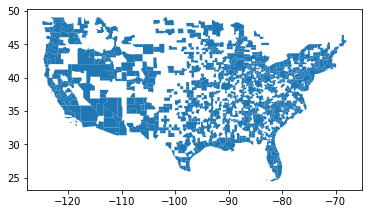

In [22]:
metro_geodata_ready_contiguous[metro_geodata_ready_contiguous.Region == 'The_contiguous_US'].plot()

In [23]:
metro_geodata_ready_Contiguous = metro_geodata_ready[metro_geodata_ready.Region =='The_contiguous_US']

The above geodata is ready to use

# 2. Migration CSV Data Process

In [26]:
migration2018_rawdata = pd.read_csv('data/06_Migration_Metro_to_Metro_2018.csv',
                                    dtype={
                                       'Current Residence Metro Code1':str,
                                       'Residence 1 Year Ago Metro Code1':str
                                           }
                                           )

migration2018_rawdata.head()



Current Residence Metro Code1 Residence 1 Year Ago Metro Code1  \
0                         10180                            10740   
1                         10180                            11100   
2                         10180                            12060   
3                         10180                            12420   
4                         10180                            12580   

  Metropolitan Statistical Area of Current Residence  \
0                             Abilene, TX Metro Area   
1                             Abilene, TX Metro Area   
2                             Abilene, TX Metro Area   
3                             Abilene, TX Metro Area   
4                             Abilene, TX Metro Area   

   Population 1 Year and Over  Nonmovers  \
0                      167649     130384   
1                      167649     130384   
2                      167649     130384   
3                      167649     130384   
4                      167649     130384   

   Movers within Same Metropolitan Statistical Area  \
0                                             21221   
1                                             21221   
2                                             21221   
3                                             21221   
4                                             21221   

   Movers from Different Metropolitan Statistical Area2  \
0                                              11121      
1                                              11121      
2                                              11121      
3                                              11121      
4                                              11121      

   Movers from Elsewhere in the U.S. or Puerto Rico  Movers from Abroad3  \
0                                              3883                 1040   
1                                              3883                 1040   
2                                              3883                 1040   
3                                              3883                 1040   
4                                              3883                 1040   

  Metropolitan Statistical Area of Residence 1 Year Ago  \
0                         Albuquerque, NM Metro Area      
1                            Amarillo, TX Metro Area      
2       Atlanta-Sandy Springs-Roswell, GA Metro Area      
3                   Austin-Round Rock, TX Metro Area      
4           Baltimore-Columbia-Towson, MD Metro Area      

   Population 1 Year and Over.1  Nonmovers.1  \
0                        897771       773804   
1                        262324       212065   
2                       5667591      4846011   
3                       1990877      1655990   
4                       2757814      2390738   

   Movers within Same Metropolitan Statistical Area.1  \
0                                              88078    
1                                              34679    
2                                             625274    
3                                             241369    
4                                             263600    

   Movers to Different Metropolitan Statistical Area2  \
0                                              28944    
1                                              11114    
2                                             161709    
3                                              81180    
4                                              97429    

   Movers to Elsewhere in the U.S. or Puerto Rico  \
0                                            6945   
1                                            4466   
2                                           34597   
3                                           12338   
4                                            6047   

   Movers in Metro-to-Metro Flow  
0                              3  
1                            234  
2                            117  
3                            348  
4                       

In [27]:
migration2018_rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49739 entries, 0 to 49738
Data columns (total 16 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   Current Residence Metro Code1                          49739 non-null  object
 1   Residence 1 Year Ago Metro Code1                       49739 non-null  object
 2   Metropolitan Statistical Area of Current Residence     49739 non-null  object
 3   Population 1 Year and Over                             49739 non-null  int64 
 4   Nonmovers                                              49739 non-null  int64 
 5   Movers within Same Metropolitan Statistical Area       49739 non-null  int64 
 6   Movers from Different Metropolitan Statistical Area2   49739 non-null  int64 
 7   Movers from Elsewhere in the U.S. or Puerto Rico       49739 non-null  int64 
 8   Movers from Abroad3                                    4

# 3. Sort by Out-Migration Population

In [28]:
Columns_to_keep1 = ['Residence 1 Year Ago Metro Code1','Movers in Metro-to-Metro Flow']

by_OutMigration1 = migration2018_rawdata [Columns_to_keep1]

In [29]:
by_OutMigration1.head()

Residence 1 Year Ago Metro Code1  Movers in Metro-to-Metro Flow
0                            10740                              3
1                            11100                            234
2                            12060                            117
3                            12420                            348
4                            12580                              8

In [30]:
by_OutMigration1.columns =['GEOID','Out_Migration_Population']

by_OutMigration1.head()

GEOID  Out_Migration_Population
0  10740                         3
1  11100                       234
2  12060                       117
3  12420                       348
4  12580                         8

In [31]:
by_OutMigration1_group = by_OutMigration1.groupby(by=["GEOID"]).sum()


In [32]:
by_OutMigration1_group.head()

Out_Migration_Population
GEOID                          
10180                      8270
10380                     11704
10420                     25964
10500                      5509
10540                      6686

In [33]:
by_OutMigration1_sort = by_OutMigration1_group.sort_values(by='Out_Migration_Population', ascending=False)

In [34]:
by_OutMigration1_sort.info()

<class 'pandas.core.frame.DataFrame'>
Index: 390 entries, 35620 to 30300
Data columns (total 1 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Out_Migration_Population  390 non-null    int64
dtypes: int64(1)
memory usage: 6.1+ KB


In [35]:
by_OutMigration1_ready = metro_geodata_ready.merge(by_OutMigration1_sort,
                                                   on='GEOID'
                                                  )

In [36]:
by_OutMigration1_ready['Region'] = 'The_contiguous_US'

by_OutMigration1_ready.loc[by_OutMigration1_ready['GEOID'] == '39380','Region'] = 'Non_the_contiguous_US'
by_OutMigration1_ready.loc[by_OutMigration1_ready['GEOID'] == '46520','Region'] = 'Non_the_contiguous_US'
by_OutMigration1_ready.loc[by_OutMigration1_ready['GEOID'] == '11260','Region'] = 'Non_the_contiguous_US'
by_OutMigration1_ready.loc[by_OutMigration1_ready['GEOID'] == '21820','Region'] = 'Non_the_contiguous_US'
by_OutMigration1_ready.loc[by_OutMigration1_ready['GEOID'] == '45940','Region'] = 'Non_the_contiguous_US'
by_OutMigration1_ready.loc[by_OutMigration1_ready['GEOID'] == '41980','Region'] = 'Non_the_contiguous_US'
by_OutMigration1_ready.loc[by_OutMigration1_ready['GEOID'] == '38660','Region'] = 'Non_the_contiguous_US'
by_OutMigration1_ready.loc[by_OutMigration1_ready['GEOID'] == '27980','Region'] = 'Non_the_contiguous_US'
by_OutMigration1_ready.loc[by_OutMigration1_ready['GEOID'] == '10380','Region'] = 'Non_the_contiguous_US'
by_OutMigration1_ready.loc[by_OutMigration1_ready['GEOID'] == '32420','Region'] = 'Non_the_contiguous_US'
by_OutMigration1_ready.loc[by_OutMigration1_ready['GEOID'] == '11640','Region'] = 'Non_the_contiguous_US'
by_OutMigration1_ready.loc[by_OutMigration1_ready['GEOID'] == '41900','Region'] = 'Non_the_contiguous_US'
by_OutMigration1_ready.loc[by_OutMigration1_ready['GEOID'] == '25020','Region'] = 'Non_the_contiguous_US'



In [37]:
by_OutMigration1_ready.head()

GEOID                                       Metro_Name  \
0  12020              Athens-Clarke County, GA Metro Area   
1  12060  Atlanta-Sandy Springs-Alpharetta, GA Metro Area   
2  12100           Atlantic City-Hammonton, NJ Metro Area   
3  12220                    Auburn-Opelika, AL Metro Area   
4  12260        Augusta-Richmond County, GA-SC Metro Area   

                                            geometry State             Region  \
0  POLYGON ((-83.53739 33.96591, -83.53184 33.968...    GA  The_contiguous_US   
1  POLYGON ((-85.33823 33.65312, -85.33842 33.654...    GA  The_contiguous_US   
2  POLYGON ((-74.85675 39.42076, -74.85670 39.420...    NJ  The_contiguous_US   
3  POLYGON ((-85.29322 32.73073, -85.28826 32.730...    AL  The_contiguous_US   
4  POLYGON ((-82.21865 33.68630, -82.21856 33.686...    SC  The_contiguous_US   

   Out_Migration_Population  
0                      8686  
1                    161709  
2                     12405  
3                     10146  
4                     20002

In [38]:
by_OutMigration1_ready_Contiguous = by_OutMigration1_ready[by_OutMigration1_ready.Region =='The_contiguous_US']

In [39]:
by_OutMigration1_ready_Contiguous.head()

GEOID                                       Metro_Name  \
0  12020              Athens-Clarke County, GA Metro Area   
1  12060  Atlanta-Sandy Springs-Alpharetta, GA Metro Area   
2  12100           Atlantic City-Hammonton, NJ Metro Area   
3  12220                    Auburn-Opelika, AL Metro Area   
4  12260        Augusta-Richmond County, GA-SC Metro Area   

                                            geometry State             Region  \
0  POLYGON ((-83.53739 33.96591, -83.53184 33.968...    GA  The_contiguous_US   
1  POLYGON ((-85.33823 33.65312, -85.33842 33.654...    GA  The_contiguous_US   
2  POLYGON ((-74.85675 39.42076, -74.85670 39.420...    NJ  The_contiguous_US   
3  POLYGON ((-85.29322 32.73073, -85.28826 32.730...    AL  The_contiguous_US   
4  POLYGON ((-82.21865 33.68630, -82.21856 33.686...    SC  The_contiguous_US   

   Out_Migration_Population  
0                      8686  
1                    161709  
2                     12405  
3                     10146  
4                     20002

In [40]:
migration1_web_mercator = by_OutMigration1_ready_Contiguous.to_crs(epsg=3857)
metromap_web_mercator = metro_geodata_ready_Contiguous.to_crs(epsg=3857)

Text(0.5, 1.0, 'Metro-Level Out-Migration Population')

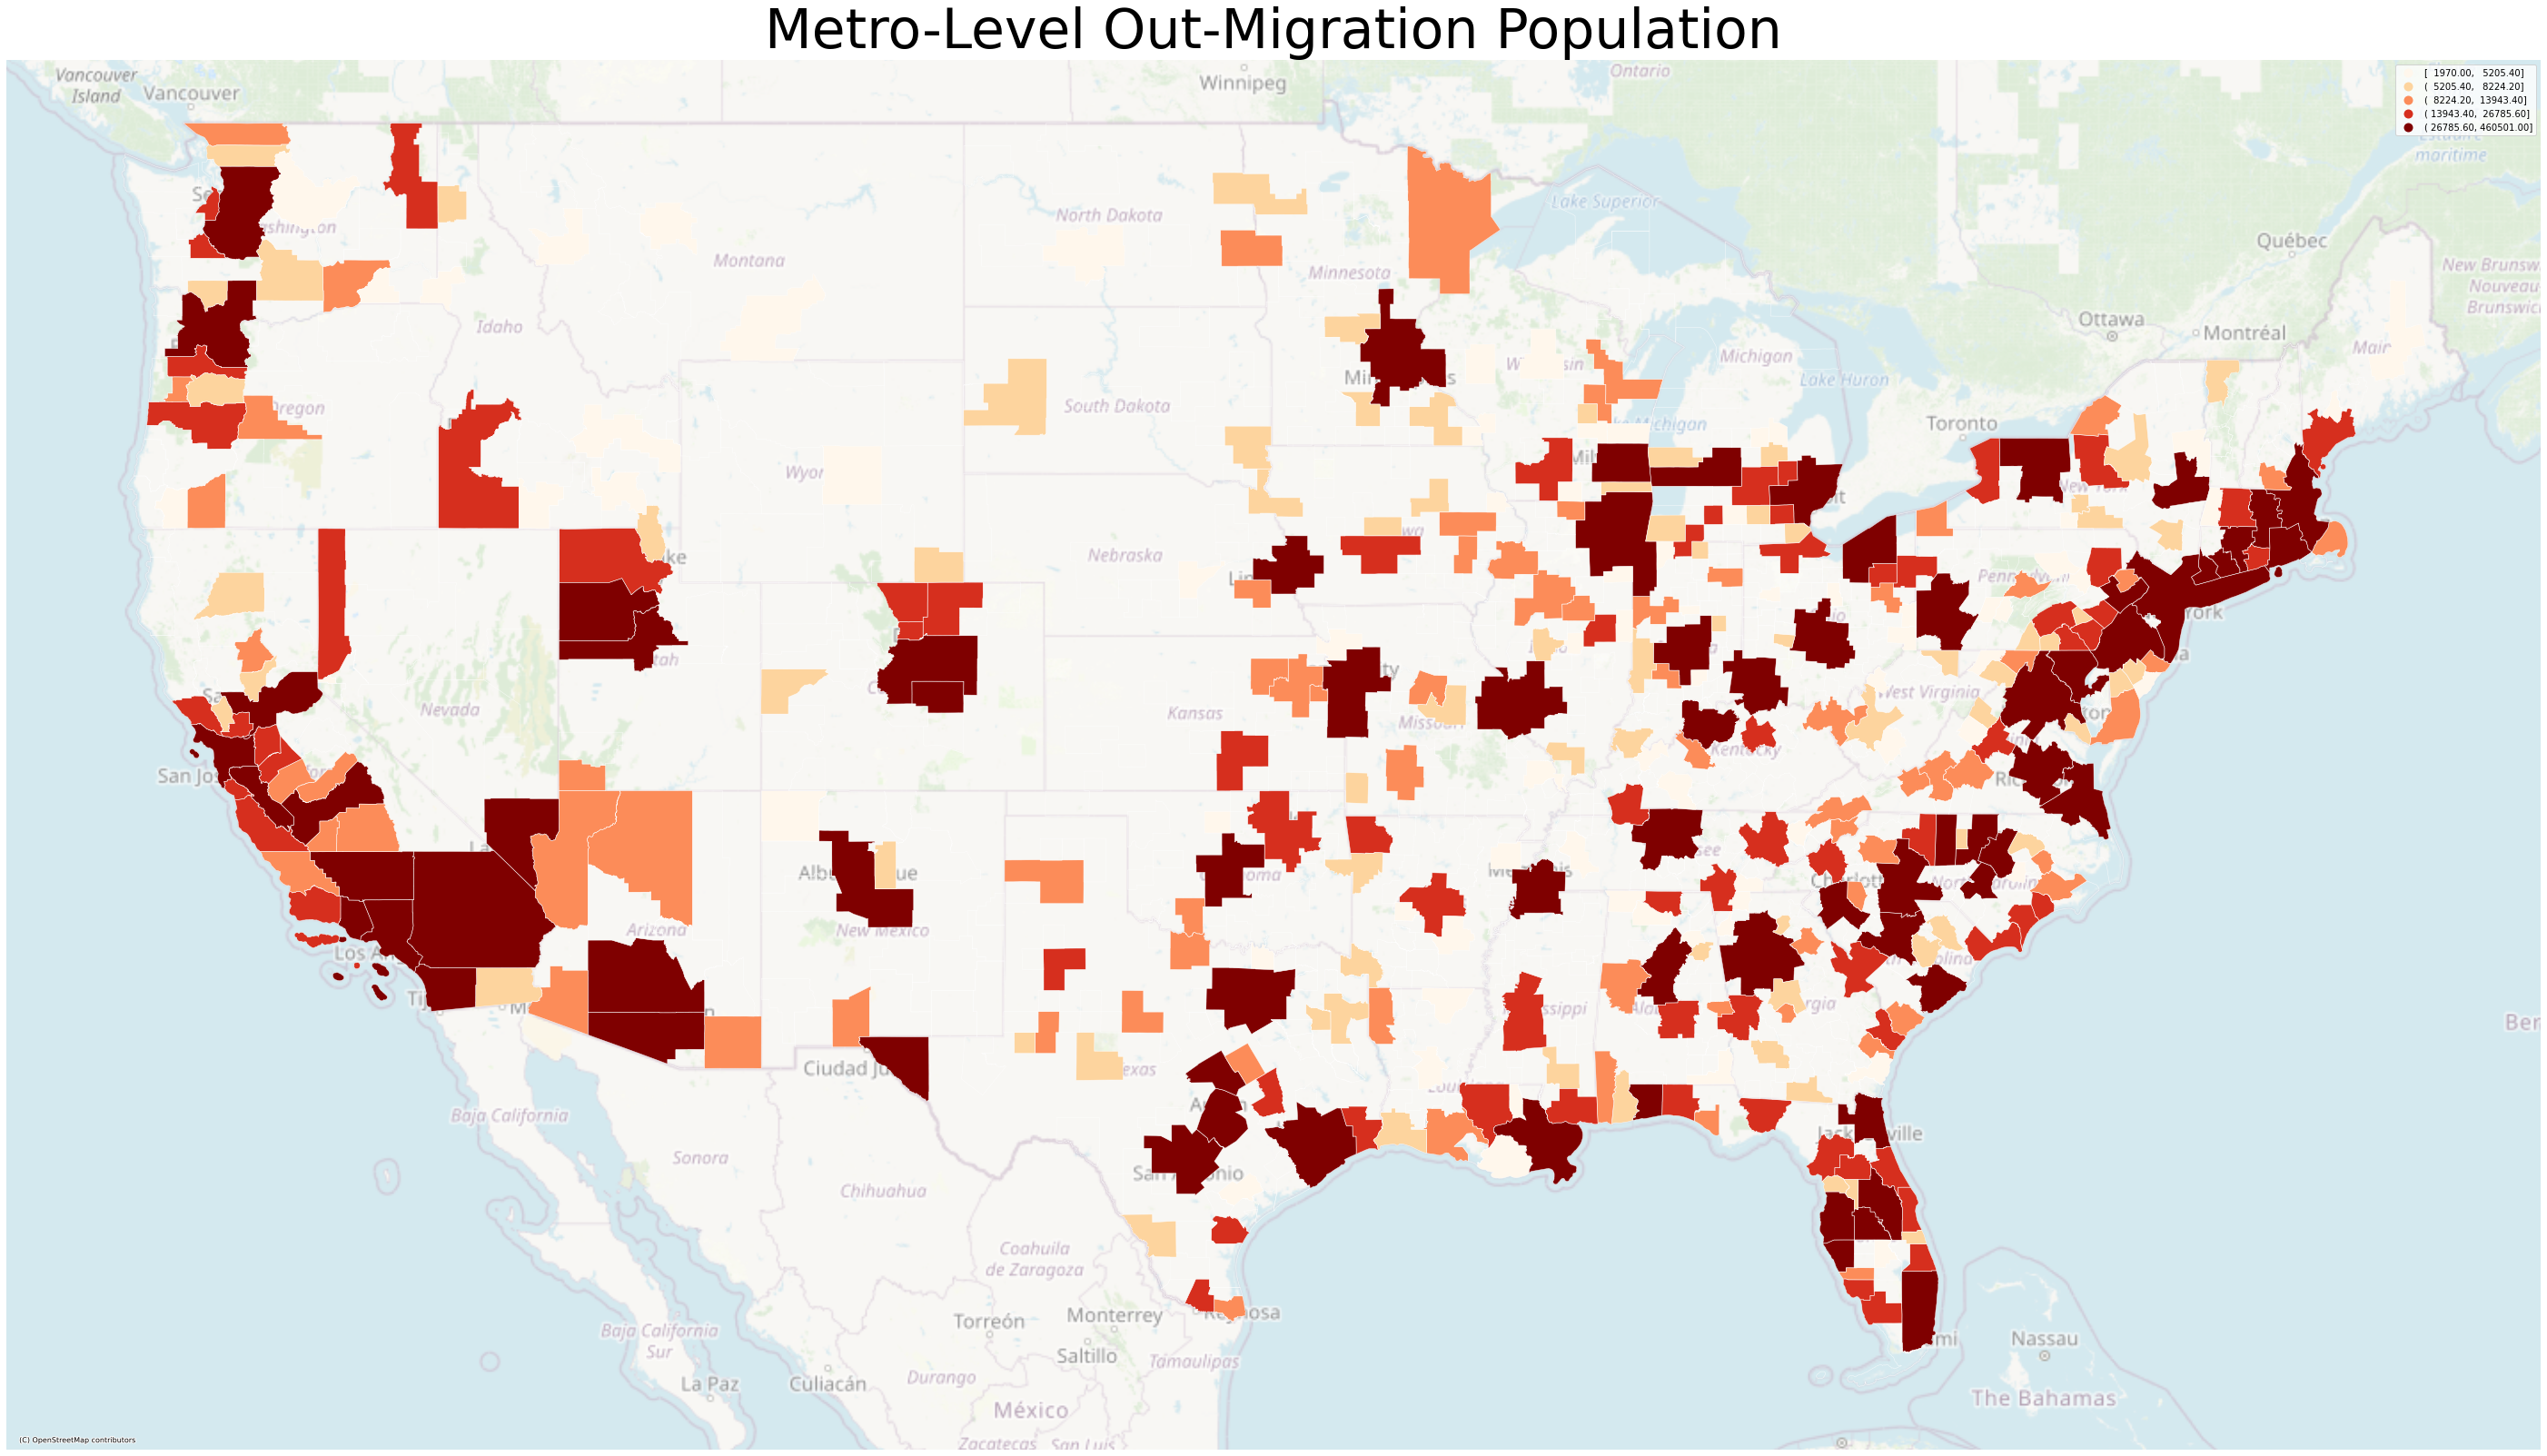

In [41]:


fig, axs = plt.subplots(1,1, figsize=(50, 30))
ax = axs




migration1_web_mercator.plot(ax=ax,
                             cmap='OrRd',
                             column = 'Out_Migration_Population',
                             scheme='Quantiles',
                             legend=True,
                                                        )


metromap_web_mercator.plot(ax=ax,
                                                                           facecolor='none',
                                                                           edgecolor='white',
                                                                            lw=0.5,
                                                                            alpha=0.8)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, alpha=0.5)

ax.axis("off")
ax.set_title("Metro-Level Out-Migration Population",fontsize = 60)





In [42]:
by_OutMigration1_top5andbottom5 = by_OutMigration1_sort.iloc[np.r_[0:5, -5:0]]


In [43]:
by_OutMigration1_top5andbottom5 = by_OutMigration1_top5andbottom5.merge(metro_geodata_ready_contiguous,
                                                                        on='GEOID',
                                                                        how='left'
                                                                       )

In [44]:
by_OutMigration1_top5andbottom5

GEOID  Out_Migration_Population  \
0  35620                    460501   
1  31080                    365670   
2  16980                    249120   
3  47900                    241889   
4  41860                    184898   
5  20220                      2577   
6  19180                      2442   
7  16220                      2263   
8  37620                      2047   
9  30300                      1970   

                                          Metro_Name  \
0   New York-Newark-Jersey City, NY-NJ-PA Metro Area   
1      Los Angeles-Long Beach-Anaheim, CA Metro Area   
2      Chicago-Naperville-Elgin, IL-IN-WI Metro Area   
3  Washington-Arlington-Alexandria, DC-VA-MD-WV M...   
4      San Francisco-Oakland-Berkeley, CA Metro Area   
5                             Dubuque, IA Metro Area   
6                            Danville, IL Metro Area   
7                              Casper, WY Metro Area   
8                  Parkersburg-Vienna, WV Metro Area   
9                         Lewiston, ID-WA Metro Area   

                                            geometry State             Region  
0  POLYGON ((-74.88982 40.78773, -74.88971 40.787...    PA  The_contiguous_US  
1  MULTIPOLYGON (((-118.12590 33.69715, -118.1557...    CA  The_contiguous_US  
2  POLYGON ((-88.60224 41.63139, -88.61185 41.631...    WI  The_contiguous_US  
3  POLYGON ((-78.28480 38.75932, -78.29007 38.766...    WV  The_contiguous_US  
4  MULTIPOLYGON (((-122.61228 37.81522, -122.6260...    CA  The_contiguous_US  
5  POLYGON ((-91.13089 42.47126, -91.13115 42.471...    IA  The_contiguous_US  
6  POLYGON ((-87.92944 40.26969, -87.92943 40.270...    IL  The_contiguous_US  
7  POLYGON ((-106.91286 42.43319, -106.91416 42.4...    WY  The_contiguous_US  
8  POLYGON ((-81.58145 39.02618, -81.59519 39.031...    WV  The_contiguous_US  
9  POLYGON ((-116.91607 45.99536, -116.91626 45.9...    WA  The_contiguous_US

In [45]:
fig = px.bar(by_OutMigration1_top5andbottom5,
       y='Metro_Name',
       x = ['Out_Migration_Population'],
       title='Top 5 and Bottom 5 of Metro Regions with Out-Migration Population',
             orientation = 'h',
             )

fig.update_traces( textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

In [46]:
migration2018_rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49739 entries, 0 to 49738
Data columns (total 16 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   Current Residence Metro Code1                          49739 non-null  object
 1   Residence 1 Year Ago Metro Code1                       49739 non-null  object
 2   Metropolitan Statistical Area of Current Residence     49739 non-null  object
 3   Population 1 Year and Over                             49739 non-null  int64 
 4   Nonmovers                                              49739 non-null  int64 
 5   Movers within Same Metropolitan Statistical Area       49739 non-null  int64 
 6   Movers from Different Metropolitan Statistical Area2   49739 non-null  int64 
 7   Movers from Elsewhere in the U.S. or Puerto Rico       49739 non-null  int64 
 8   Movers from Abroad3                                    4

In [47]:
Columns_to_keep5 =['Residence 1 Year Ago Metro Code1',
                   'Metropolitan Statistical Area of Residence 1 Year Ago',
                  'Population 1 Year and Over.1',
                  'Nonmovers.1',
                  'Movers within Same Metropolitan Statistical Area.1',
                  'Movers to Different Metropolitan Statistical Area2',
                  'Movers to Elsewhere in the U.S. or Puerto Rico']

migration2018_OutMigration_Rawdata = migration2018_rawdata[Columns_to_keep5]


migration2018_OutMigration_Rawdata.columns = ['GEOID','Metro_Name','Population','Non_Movers','Within_Metro','Different_Metro','Non_Metro']

In [48]:
migration2018_OutMigration_Rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49739 entries, 0 to 49738
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   GEOID            49739 non-null  object
 1   Metro_Name       49739 non-null  object
 2   Population       49739 non-null  int64 
 3   Non_Movers       49739 non-null  int64 
 4   Within_Metro     49739 non-null  int64 
 5   Different_Metro  49739 non-null  int64 
 6   Non_Metro        49739 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 2.7+ MB


In [49]:
migration2018_OutMigration_Rawdata = migration2018_OutMigration_Rawdata.drop_duplicates()

In [50]:
migration2018_OutMigration_Rawdata['Out_Migration_Population'] = migration2018_OutMigration_Rawdata['Population'] - migration2018_OutMigration_Rawdata['Non_Movers']

In [51]:
migration2018_OutMigration_Rawdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390 entries, 0 to 4061
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   GEOID                     390 non-null    object
 1   Metro_Name                390 non-null    object
 2   Population                390 non-null    int64 
 3   Non_Movers                390 non-null    int64 
 4   Within_Metro              390 non-null    int64 
 5   Different_Metro           390 non-null    int64 
 6   Non_Metro                 390 non-null    int64 
 7   Out_Migration_Population  390 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 27.4+ KB


In [52]:
Top5_OutMigration_raw = migration2018_OutMigration_Rawdata.sort_values(by='Out_Migration_Population', ascending=False)
Top5_OutMigration = Top5_OutMigration_raw.head(5)
Top5_OutMigration

GEOID                                        Metro_Name  Population  \
58  35620  New York-Newark-Jersey City, NY-NJ-PA Metro Area    19847550   
48  31080     Los Angeles-Long Beach-Anaheim, CA Metro Area    13137459   
14  16980     Chicago-Naperville-Elgin, IL-IN-WI Metro Area     9479646   
21  19100        Dallas-Fort Worth-Arlington, TX Metro Area     7073136   
35  26420   Houston-The Woodlands-Sugar Land, TX Metro Area     6593374   

    Non_Movers  Within_Metro  Different_Metro  Non_Metro  \
58    17909377       1444576           460501      33096   
48    11627233       1126203           365670      18353   
14     8236723        953743           249120      40060   
21     6006575        848993           174694      42874   
35     5650836        758679           148881      34978   

    Out_Migration_Population  
58                   1938173  
48                   1510226  
14                   1242923  
21                   1066561  
35                    942538

In [53]:
Top5_WithinMetro_raw = migration2018_OutMigration_Rawdata.sort_values(by='Within_Metro', ascending=False)
Top5_WithinMetro = Top5_WithinMetro_raw.head(5)
Top5_WithinMetro

GEOID                                        Metro_Name  Population  \
58  35620  New York-Newark-Jersey City, NY-NJ-PA Metro Area    19847550   
48  31080     Los Angeles-Long Beach-Anaheim, CA Metro Area    13137459   
14  16980     Chicago-Naperville-Elgin, IL-IN-WI Metro Area     9479646   
21  19100        Dallas-Fort Worth-Arlington, TX Metro Area     7073136   
35  26420   Houston-The Woodlands-Sugar Land, TX Metro Area     6593374   

    Non_Movers  Within_Metro  Different_Metro  Non_Metro  \
58    17909377       1444576           460501      33096   
48    11627233       1126203           365670      18353   
14     8236723        953743           249120      40060   
21     6006575        848993           174694      42874   
35     5650836        758679           148881      34978   

    Out_Migration_Population  
58                   1938173  
48                   1510226  
14                   1242923  
21                   1066561  
35                    942538

In [54]:
Top5_DifferentMetro_raw = migration2018_OutMigration_Rawdata.sort_values(by='Different_Metro', ascending=False)
Top5_DifferentMetro = Top5_DifferentMetro_raw.head(5)
Top5_DifferentMetro

GEOID                                         Metro_Name  Population  \
58  35620   New York-Newark-Jersey City, NY-NJ-PA Metro Area    19847550   
48  31080      Los Angeles-Long Beach-Anaheim, CA Metro Area    13137459   
14  16980      Chicago-Naperville-Elgin, IL-IN-WI Metro Area     9479646   
97  47900  Washington-Arlington-Alexandria, DC-VA-MD-WV M...     6028387   
80  41860       San Francisco-Oakland-Hayward, CA Metro Area     4595540   

    Non_Movers  Within_Metro  Different_Metro  Non_Metro  \
58    17909377       1444576           460501      33096   
48    11627233       1126203           365670      18353   
14     8236723        953743           249120      40060   
97     5143346        623001           241889      20151   
80     4017852        381956           184898      10834   

    Out_Migration_Population  
58                   1938173  
48                   1510226  
14                   1242923  
97                    885041  
80                    577688

In [55]:
Top5_NonMetro_raw = migration2018_OutMigration_Rawdata.sort_values(by='Non_Metro', ascending=False)
Top5_NonMetro = Top5_NonMetro_raw.head(5)
Top5_NonMetro

GEOID                                        Metro_Name  Population  \
21  19100        Dallas-Fort Worth-Arlington, TX Metro Area     7073136   
14  16980     Chicago-Naperville-Elgin, IL-IN-WI Metro Area     9479646   
35  26420   Houston-The Woodlands-Sugar Land, TX Metro Area     6593374   
2   12060      Atlanta-Sandy Springs-Roswell, GA Metro Area     5667591   
58  35620  New York-Newark-Jersey City, NY-NJ-PA Metro Area    19847550   

    Non_Movers  Within_Metro  Different_Metro  Non_Metro  \
21     6006575        848993           174694      42874   
14     8236723        953743           249120      40060   
35     5650836        758679           148881      34978   
2      4846011        625274           161709      34597   
58    17909377       1444576           460501      33096   

    Out_Migration_Population  
21                   1066561  
14                   1242923  
35                    942538  
2                     821580  
58                   1938173

In [56]:
fig = make_subplots(rows=1, 
                    cols=1,
                    shared_xaxes=True,
                    vertical_spacing=0.02
                    )

fig.add_trace(go.Bar(y=Top5_OutMigration['Metro_Name'], 
                     x=Top5_OutMigration['Out_Migration_Population'],
                    text= Top5_OutMigration['Out_Migration_Population'],
                     textposition="outside",
                     orientation = 'h',
                    name="Total Out-Migration_Population",
                    ),
              row=1, col=1)

fig.update_layout(height=500, width=1000,
                  title_text="Top 5 Metro Area for Out-Migration")

fig.update_layout(legend_title_text = "Metro Area")
fig.update_layout(legend_font_size=11)
fig.update_layout(legend_title_font_size=15)
fig.show()

In [57]:
fig = make_subplots(rows=3, 
                    cols=1,
                    shared_xaxes=True,
                    vertical_spacing=0.02
                    )


fig.add_trace(go.Bar(y=Top5_DifferentMetro['Metro_Name'], 
                     x=Top5_DifferentMetro['Different_Metro'],
                    text= Top5_DifferentMetro['Different_Metro'],
                     textposition="outside",
                     orientation = 'h',
                    name="Move to Different Metro Area"),
              row=1, col=1,)

fig.add_trace(go.Bar(y=Top5_WithinMetro['Metro_Name'], 
                     x=Top5_WithinMetro['Within_Metro'],
                    text= Top5_WithinMetro['Within_Metro'],
                     textposition="outside",
                     orientation = 'h',
                    name="Move within Metro Area"),
              row=2, col=1,)

fig.add_trace(go.Bar(y=Top5_NonMetro['Metro_Name'], 
                     x=Top5_NonMetro['Non_Metro'],
                    text= Top5_NonMetro['Non_Metro'],
                     textposition="outside",
                     orientation = 'h',
                    name="Move to Non-Metro Area",
                    ),row=3, col=1,)

fig.update_layout(height=1000, width=1000,
                  title_text="Top 5 Metro Area for Out-Migration")

fig.update_layout(legend_title_text = "Metro Area")
fig.update_layout(legend_font_size=11)
fig.update_layout(legend_title_font_size=15)
fig.show()